# Modelos de Regresión Lineal
## Modelo con datos simulados
* y = a + b * x
* X : 100 valores distribuídos según una N(1.5, 2.5)
* Ye = 5 + 1.9 * x + e
* e estará distribuído según una N(0, 0.8)

In [1]:
import pandas as pd
import numpy as np

In [2]:
x = 1.5 + 2.5 * np.random.randn(100)

In [3]:
res = 0 + 0.8 * np.random.randn(100)

In [4]:
y_pred = 5 + 0.3 * x

In [5]:
y_act = 5 + 0.3 * x + res

In [6]:
x_list = x.tolist()
y_pred_list = y_pred.tolist()
y_act_list = y_act.tolist()

In [7]:
data = pd.DataFrame(
    {
        "x":x_list,
        "y_actual":y_act_list,
        "y_prediccion":y_pred_list
    }
)

In [8]:
data.head()

,x,y_actual,y_prediccion
0,0.349196,5.850674,5.104759
1,4.625840,6.411223,6.387752
2,-1.565648,3.439404,4.530306
3,1.770299,5.332588,5.531090
4,-0.336654,4.535240,4.899004


In [9]:
import matplotlib.pyplot as plt

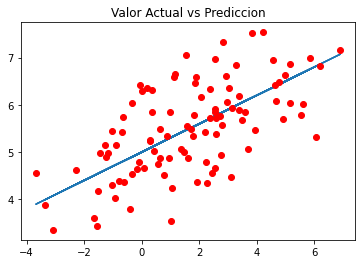

In [10]:
%matplotlib inline
plt.plot(x,y_pred)
plt.plot(x,y_act, "ro")
plt.title("Valor Actual vs Prediccion")
plt.show()

In [11]:
y_mean = [np.mean(y_act) for i in range(1, len(x_list) + 1)]

Text(0.5, 1.0, 'Valor Actual vs Predicción')

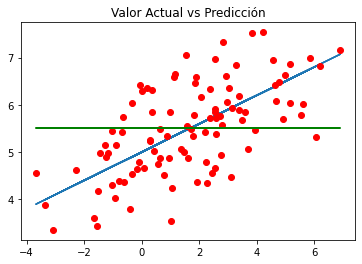

In [12]:
%matplotlib inline
plt.plot(data["x"],data["y_prediccion"])
plt.plot(data["x"], data["y_actual"], "ro")
plt.plot(data["x"],y_mean, "g")
plt.title("Valor Actual vs Predicción")

## ¿Como es la predicción de buena?
* SST = SSD + SSR
* SST : Variabilidad de los datos con respecto de su media
* SSD : Diferencia entre los datos originales y las predicciones que el modelo no es capaz de explicar (errores que deberían seguir una distribución normal)
* SSR : Diferencia entre la regresión y el valor medio que el modelo busca explicar
* R2 = SSR / SST, coeficiente de determinación entre 0 y 1

In [13]:
y_m = np.mean(y_act)
data["SSR"]=(data["y_prediccion"]-y_m)**2
data["SSD"]=(data["y_prediccion"]-data["y_actual"])**2
data["SST"]=(data["y_actual"]-y_m)**2

In [14]:
data.head()

,x,y_actual,y_prediccion,SSR,SSD,SST
0,0.349196,5.850674,5.104759,0.156567,0.556390,0.122661
1,4.625840,6.411223,6.387752,0.787316,0.000551,0.829519
2,-1.565648,3.439404,4.530306,0.941168,1.190065,4.247883
3,1.770299,5.332588,5.531090,0.000939,0.039403,0.028176
4,-0.336654,4.535240,4.899004,0.361730,0.132324,0.931619


In [15]:
SSR = sum(data["SSR"])
SSD = sum(data["SSD"])
SST = sum(data["SST"])

In [16]:
SSR

45.8389581555636

In [17]:
SSD

57.12676639142965

In [18]:
SST

92.58891270452816

In [19]:
SSR+SSD

102.96572454699324

In [20]:
R2 = SSR/SST

In [21]:
R2

0.49508042395795193

(array([ 8.,  6.,  8., 12., 20., 20., 10.,  8.,  5.,  3.]),
 array([-1.59053055, -1.25597852, -0.9214265 , -0.58687448, -0.25232246,
         0.08222957,  0.41678159,  0.75133361,  1.08588564,  1.42043766,
         1.75498968]),
 <BarContainer object of 10 artists>)

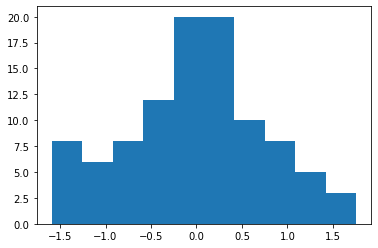

In [22]:
plt.hist(data["y_prediccion"]-data["y_actual"])

## Obteniendo la recta de regresión 

* y = a + b * x
* b = sum((xi - x_m)*(y_i-y_m))/sum((xi-x_m)^2)
* a = y_m - b * x_m

In [23]:
x_mean = np.mean(data["x"])
y_mean = np.mean(data["y_actual"])
x_mean, y_mean

(1.653165613787801, 5.500443772271921)

In [24]:
data["beta_n"] = (data["x"]-x_mean)*(data["y_actual"]-y_mean)
data["beta_d"] = (data["x"]-x_mean)**2

In [25]:
beta = sum(data["beta_n"])/sum(data["beta_d"])

In [26]:
alpha = y_mean - beta * x_mean

In [27]:
alpha, beta

(5.060610109459312, 0.26605541462046467)

El modelo lineal obtenido por regresión es:
y = 5.042341442370516 + 1.9044490309709992 * x

In [28]:
data["y_model"] = alpha + beta * data["x"]

In [29]:
data.head()

,x,y_actual,y_prediccion,SSR,SSD,SST,beta_n,beta_d,y_model
0,0.349196,5.850674,5.104759,0.156567,0.556390,0.122661,-0.456690,1.700336,5.153516
1,4.625840,6.411223,6.387752,0.787316,0.000551,0.829519,2.707451,8.836794,6.291340
2,-1.565648,3.439404,4.530306,0.941168,1.190065,4.247883,6.634101,10.360761,4.644061
3,1.770299,5.332588,5.531090,0.000939,0.039403,0.028176,-0.019662,0.013720,5.531608
4,-0.336654,4.535240,4.899004,0.361730,0.132324,0.931619,1.920582,3.959382,4.971042


In [30]:
SSR = sum((data["y_model"]-y_mean)**2)
SSD = sum((data["y_model"]-data["y_actual"])**2)
SST = sum((data["y_actual"]-y_mean)**2)

In [31]:
SSR, SSD, SST

(36.05099843085268, 56.537914273675526, 92.58891270452821)

In [32]:
R2 = SSR / SST
R2

0.3893662575550425

Text(0.5, 1.0, 'Valor Actual vs Predicción')

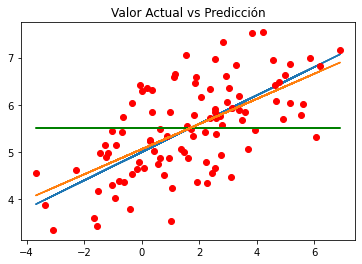

In [33]:
y_mean = [np.mean(y_act) for i in range(1, len(x_list) + 1)]

%matplotlib inline
plt.plot(data["x"],data["y_prediccion"])
plt.plot(data["x"], data["y_actual"], "ro")
plt.plot(data["x"],y_mean, "g")
plt.plot(data["x"], data["y_model"])
plt.title("Valor Actual vs Predicción")

## Error estándar de los residuos (RSE)

In [34]:
RSE = np.sqrt(SSD/(len(data)-2))
RSE

0.759550849244819

In [35]:
np.mean(data["y_actual"])

5.500443772271921

In [36]:
RSE / np.mean(data["y_actual"])

0.1380890125763601